In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import zero_one_loss

from keras.utils.np_utils import to_categorical

# Seed the random number generator:
np.random.seed(1)

def load_data(filename, skiprows = 1):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=' ')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
Using TensorFlow backend.


In [10]:
# Load training data
X = load_data('training_data.txt')
y_train = X[:, 0] # 1 or 0 
X_train = X[:, 1:] # 1000 features 

In [5]:
# fick tat
# # one hot encode/
# y_train = to_categorical(y_train)

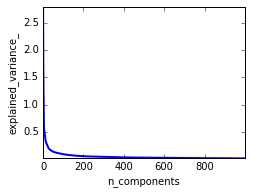

In [3]:
# Logistic regression on pca'ed data
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# PLot pca spectrum
pca.fit(X_train)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

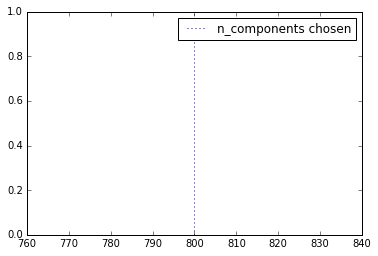

In [4]:
# Prediction
n_components = [20, 200, 800, 1000] # number of components to use
Cs = np.logspace(-4, 4, 3) # inverse regularization param

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_train, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()




In [5]:
estimator.best_params_

{'logistic__C': 1.0, 'pca__n_components': 800}

In [31]:
# Training Loss
preds = estimator.predict(X_train)
print(1 - zero_one_loss(preds, y_train))

0.8666


In [12]:
# Validation
# Best params
# {'logistic__C': 1.0, 'pca__n_components': 800}

logistic = linear_model.LogisticRegression(C=1.0)
pca = decomposition.PCA(n_components=800)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# estimator.predict(X_train)

kf = KFold(n_splits = 10, shuffle=True)
scores = []
for train_index, val_index in kf.split(X_train):
    X_train_val, X_val = X_train[train_index], X_train[val_index]
    y_train_val, y_val = y_train[train_index], y_train[val_index]
    
    pipe.fit(X_train_val, y_train_val)
    
    predator = pipe.predict(X_val)
    
    scores.append(1 - zero_one_loss(predator, y_val))

print('validation accuracy:' + str(np.mean(scores)))

validation accuracy:0.8432999999999999


In [11]:
print(np.shape(X_train))
print(np.shape(y_train))

(20000, 1000)
(20000,)


In [18]:
# del

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

print(X_digits)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
